In [1]:
!pip install missingno
!pip install tensorflow

# IMPORTING REQUIRED LIBRARIES

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph

import missingno as msno

# Importing Dataset

In [3]:
dataset=pd.read_excel('Train_dataset.xlsx')#encoding='unicode_escape')
df_cat = pd.read_excel('Train_dataset.xlsx')
X=dataset.iloc[0:787,[3,4,5,6,7,9,10,11,12,13,14]].values
features=['Population_2011','Population_2001','Sex Ratio','Median Age','Avg Temp','Toilets','Water Purity','H index','Female Pop','Hospitals','Foreign Visitors']
df=pd.DataFrame(X,columns=features)
df

,Population_2011,Population_2001,Sex Ratio,Median Age,Avg Temp,Toilets,Water Purity,H index,Female Pop,Hospitals,Foreign Visitors
0,12442373.0,11978450.0,878.0,23.0,32.0,219.0,150.0,0.700440,10924403.0,159.0,4408916.0
1,11007835.0,9879172.0,858.0,27.0,30.0,215.0,196.0,0.920018,9444722.0,148.0,2379169.0
2,8436675.0,4301326.0,936.0,28.0,37.0,212.0,102.0,0.097085,7896728.0,123.0,636502.0
3,6809970.0,3637483.0,930.0,23.0,31.0,217.0,118.0,0.827744,6333272.0,110.0,126078.0
4,5570585.0,3520085.0,852.0,29.0,25.0,227.0,109.0,0.847941,4746138.0,73.0,284973.0
...,...,...,...,...,...,...,...,...,...,...,...
782,36954.0,NaN,846.0,23.0,28.0,68.0,103.0,0.035280,31263.0,19.0,284973.0
783,36947.0,NaN,945.0,23.0,36.0,62.0,136.0,0.056394,34915.0,22.0,1489500.0
784,36828.0,NaN,1019.0,28.0,28.0,98.0,138.0,0.066752,37528.0,27.0,106153.0
785,36805.0,NaN,900.0,24.0,6.0,63.0,145.0,0.627556,33125.0,15.0,24720.0


# HANDLING MISSING VALUES

In [4]:
def missing_values_plot(df):
    
    missingdata_df=df.columns[df.isnull().any()].tolist()
    msno.matrix(df[missingdata_df])
    return missingdata_df

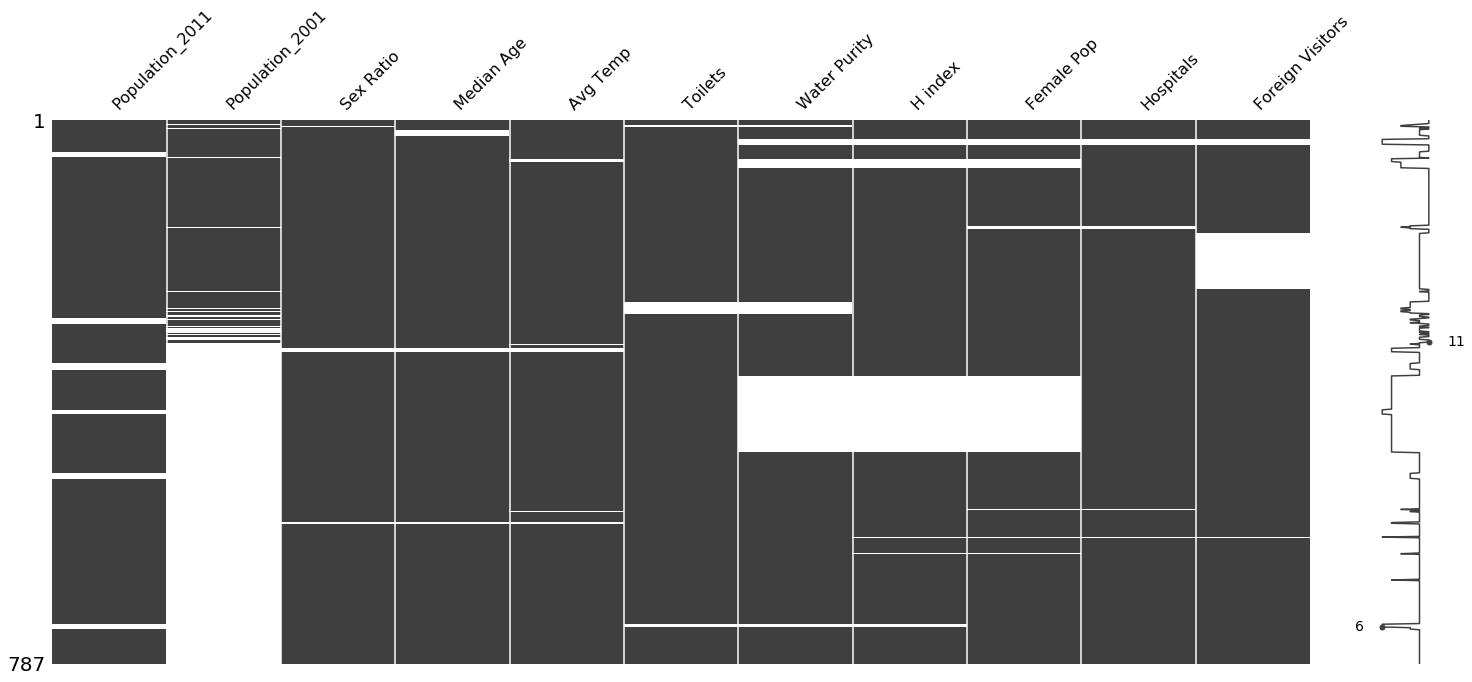

In [5]:
missingdata_df=missing_values_plot(df)

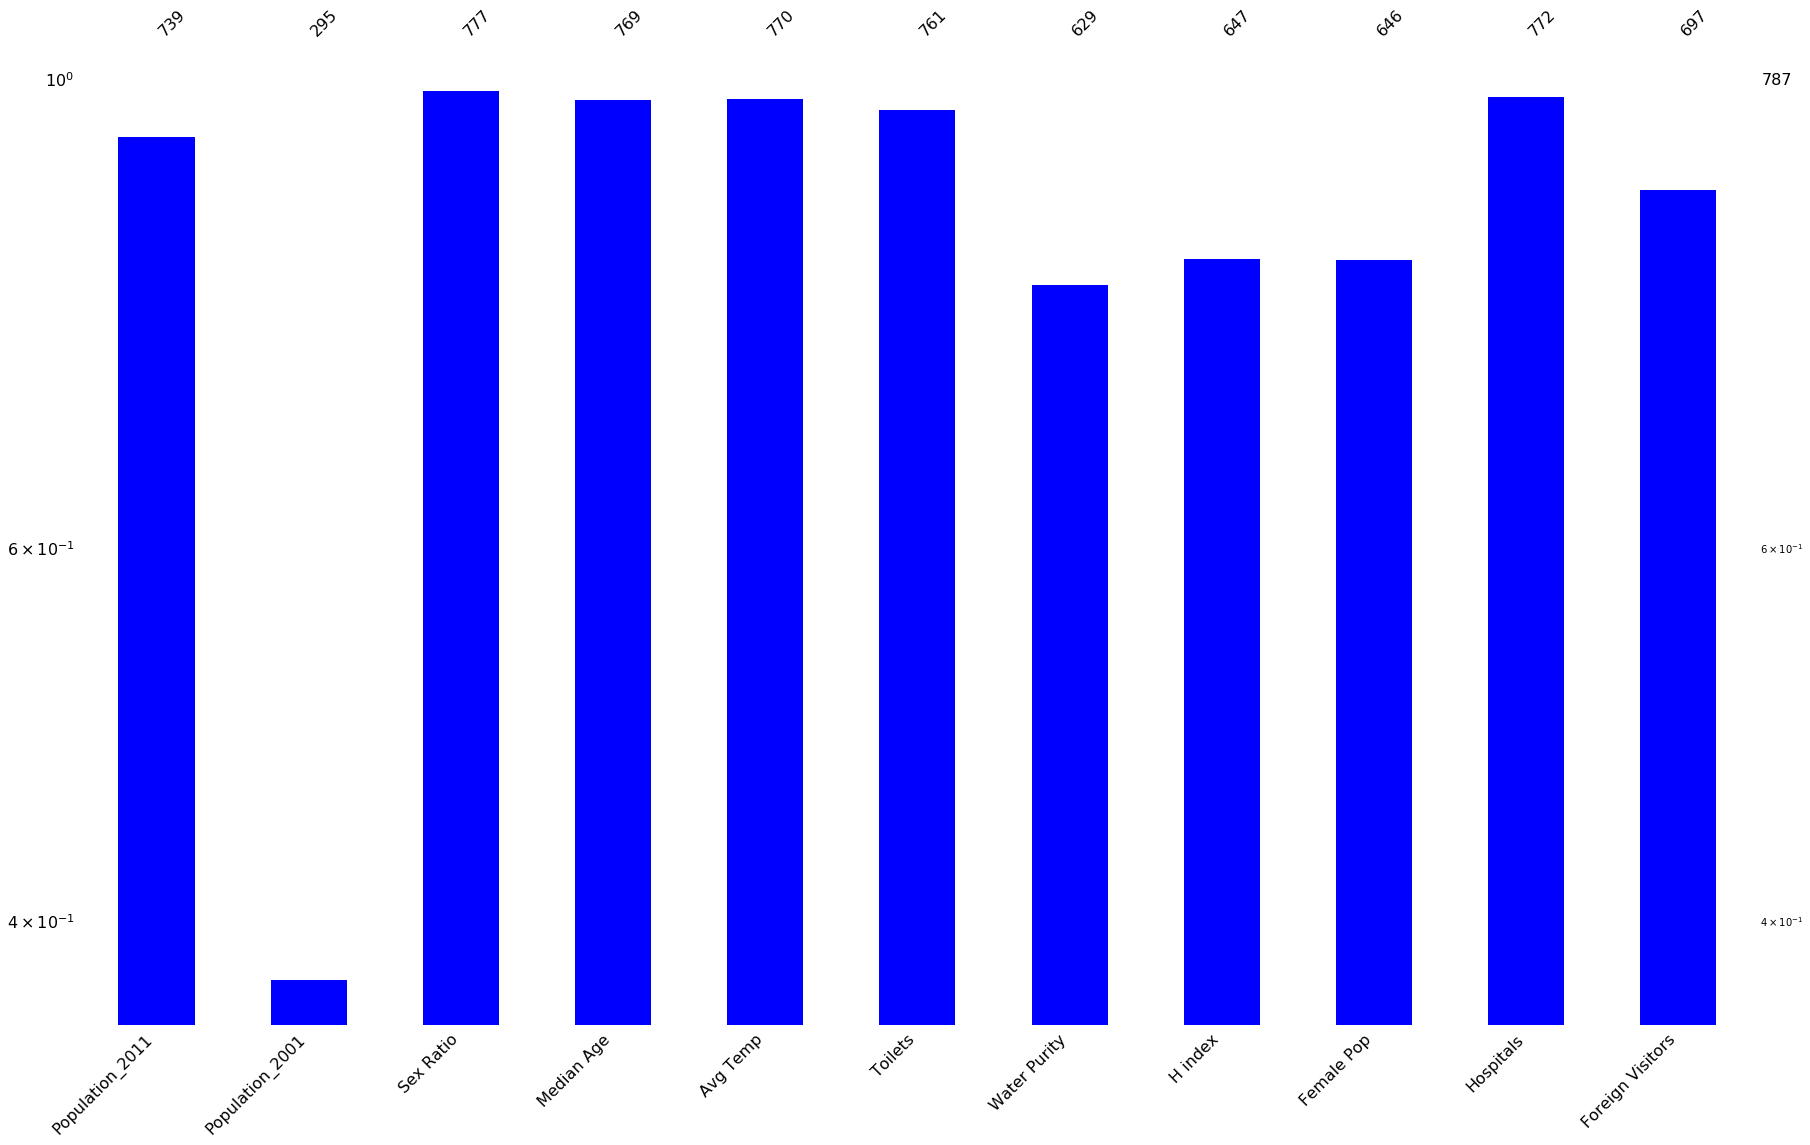

In [6]:
msno.bar(df[missingdata_df], color="blue", log=True, figsize=(30,18))

['Population_2011', 'Toilets', 'Female Pop', 'Hospitals', 'Foreign Visitors']

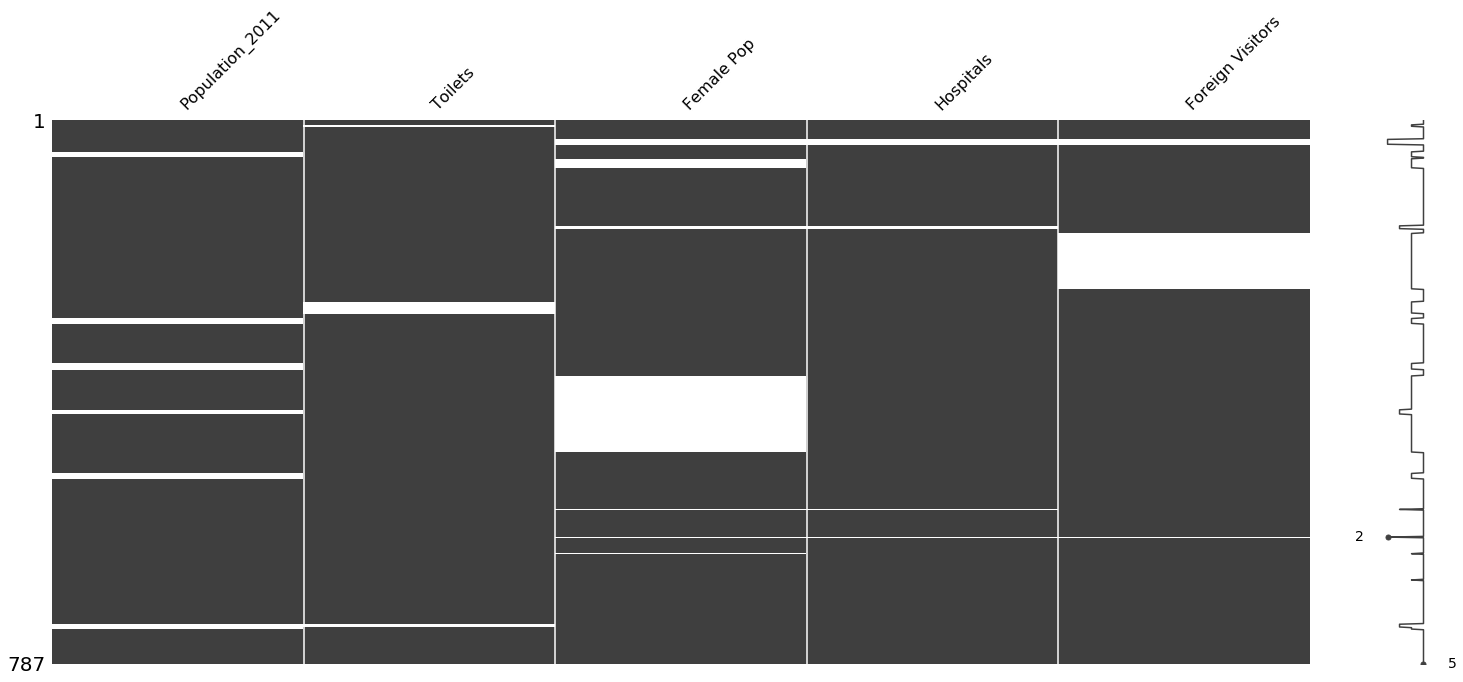

In [7]:
X_4=dataset.iloc[0:787,[3,9,12,13,14]].values
feat=['Population_2011','Toilets','Female Pop','Hospitals','Foreign Visitors']
dtf=pd.DataFrame(X_4,columns=feat)
missing_values_plot(dtf)

In [8]:
#Dealing with Missing values
def missing_values_handling(X_1,feat):
    imp_mean=IterativeImputer(random_state=0)
    X_T=imp_mean.fit_transform(X_1)

    dtframe=pd.DataFrame(X_T,columns=feat)
    train=dtframe
    missing=train.isnull().sum()
    total=train.count()
    missing_df=pd.concat([missing,total],axis=1,keys=['Missing','All'])
    print(missing_df)
    return dtframe

In [9]:
X_1=dataset.iloc[0:787,[3,9,12,13,14]].values
feat=feat
final_df=missing_values_handling(X_1,feat)
final_df.head(34)

                  Missing  All
Population_2011         0  787
Toilets                 0  787
Female Pop              0  787
Hospitals               0  787
Foreign Visitors        0  787


,Population_2011,Toilets,Female Pop,Hospitals,Foreign Visitors
0,12442373.0,219.000000,1.092440e+07,159.000000,4.408916e+06
1,11007835.0,215.000000,9.444722e+06,148.000000,2.379169e+06
2,8436675.0,212.000000,7.896728e+06,123.000000,6.365020e+05
3,6809970.0,217.000000,6.333272e+06,110.000000,1.260780e+05
4,5570585.0,227.000000,4.746138e+06,73.000000,2.849730e+05
5,4681087.0,210.000000,4.231703e+06,67.000000,4.684707e+06
6,4646732.0,145.000000,4.237820e+06,55.000000,4.684707e+06
7,4486679.0,172.403104,4.239912e+06,82.000000,1.489500e+06
8,4467797.0,159.527519,3.797627e+06,98.000000,2.849730e+05
9,3124458.0,120.783114,2.743274e+06,50.000000,4.408916e+06


In [10]:
prefinal_df=missing_values_handling(X,features)
prefinal_df

                  Missing  All
Population_2011         0  787
Population_2001         0  787
Sex Ratio               0  787
Median Age              0  787
Avg Temp                0  787
Toilets                 0  787
Water Purity            0  787
H index                 0  787
Female Pop              0  787
Hospitals               0  787
Foreign Visitors        0  787


,Population_2011,Population_2001,Sex Ratio,Median Age,Avg Temp,Toilets,Water Purity,H index,Female Pop,Hospitals,Foreign Visitors
0,12442373.0,1.197845e+07,878.0,23.0,32.0,219.0,150.0,0.700440,10924403.0,159.0,4408916.0
1,11007835.0,9.879172e+06,858.0,27.0,30.0,215.0,196.0,0.920018,9444722.0,148.0,2379169.0
2,8436675.0,4.301326e+06,936.0,28.0,37.0,212.0,102.0,0.097085,7896728.0,123.0,636502.0
3,6809970.0,3.637483e+06,930.0,23.0,31.0,217.0,118.0,0.827744,6333272.0,110.0,126078.0
4,5570585.0,3.520085e+06,852.0,29.0,25.0,227.0,109.0,0.847941,4746138.0,73.0,284973.0
...,...,...,...,...,...,...,...,...,...,...,...
782,36954.0,1.123028e+04,846.0,23.0,28.0,68.0,103.0,0.035280,31263.0,19.0,284973.0
783,36947.0,2.471994e+04,945.0,23.0,36.0,62.0,136.0,0.056394,34915.0,22.0,1489500.0
784,36828.0,-6.018899e+03,1019.0,28.0,28.0,98.0,138.0,0.066752,37528.0,27.0,106153.0
785,36805.0,2.101883e+03,900.0,24.0,6.0,63.0,145.0,0.627556,33125.0,15.0,24720.0


# Principal Component Analysis & Correlation Circle

In [11]:
def pca_analysis(X):
    sc_X=StandardScaler()
    X_scale=sc_X.fit_transform(X)
    
    pca=PCA()
    X_pca=pca.fit_transform(X_scale)
    explained_variance=pca.explained_variance_ratio_
    print(explained_variance)
    
def correlation_circle(X,labels):
    plot_pca_correlation_graph(X,labels)

In [12]:
X_tr=prefinal_df.to_numpy()
pca_analysis(X_tr)

correlation_circle(X_tr,features)

[3.34043996e-01 1.14946665e-01 1.03915149e-01 1.00005155e-01
 9.18849480e-02 8.81119539e-02 8.07009240e-02 6.48233112e-02
 1.82810883e-02 3.24554126e-03 4.12676499e-05]


In [13]:
X_final=final_df.to_numpy()
pca_analysis(X_final)

correlation_circle(X_final,feat)

[5.67630260e-01 2.01732499e-01 1.89924057e-01 4.05792359e-02
 1.33948087e-04]


In [14]:
X_final=np.delete(X_final,[7,8,9,665],0)

In [15]:
Fn_df=pd.DataFrame(X_final,columns=feat)
Fn_df

,Population_2011,Toilets,Female Pop,Hospitals,Foreign Visitors
0,12442373.0,219.0,10924403.0,159.0,4408916.0
1,11007835.0,215.0,9444722.0,148.0,2379169.0
2,8436675.0,212.0,7896728.0,123.0,636502.0
3,6809970.0,217.0,6333272.0,110.0,126078.0
4,5570585.0,227.0,4746138.0,73.0,284973.0
...,...,...,...,...,...
778,36954.0,68.0,31263.0,19.0,284973.0
779,36947.0,62.0,34915.0,22.0,1489500.0
780,36828.0,98.0,37528.0,27.0,106153.0
781,36805.0,63.0,33125.0,15.0,24720.0


# Conversion of Categorical Variables 

In [16]:
df_cat

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,Lunawada,Gujarat,M,36954.0,NaN,846.0,23.0,28.0,MEDIUM,68.0,103.0,0.035280,31263.0,19.0,284973.0,1944
783,Murshidabad,West Bengal,M,36947.0,NaN,945.0,23.0,36.0,MEDIUM,62.0,136.0,0.056394,34915.0,22.0,1489500.0,2172
784,Mahe,Puducherry,M,36828.0,NaN,1019.0,28.0,28.0,HIGH,98.0,138.0,0.066752,37528.0,27.0,106153.0,2851
785,Lanka,Assam,M.B,36805.0,NaN,900.0,24.0,6.0,MEDIUM,63.0,145.0,0.627556,33125.0,15.0,24720.0,2158


In [17]:
X_cat=df_cat.to_numpy()


In [18]:
X_cat=np.delete(X_cat,[7,8,9,665],0)

In [19]:
df_cat_1 = pd.DataFrame(data=X_cat, columns=["City", "State", "Type", "Population [2011]", "Popuation [2001]", "Sex Ratio", "Median Age", "Avg Temp", "SWM", "Toilets Avl", "Water Purity", "H Index", "Female Population", "# of hospitals", "Foreign Visitors", "Covid Cases"])

In [20]:
df_cat_1.head(15)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,1.24424e+07,1.19784e+07,878,23,32,MEDIUM,219,150,0.70044,1.09244e+07,159,4.40892e+06,163115
1,Delhi,Delhi,M.C,1.10078e+07,9.87917e+06,858,27,30,MEDIUM,215,196,0.920018,9.44472e+06,148,2.37917e+06,80188
2,Bangalore,Karnataka,MPUA,8.43668e+06,4.30133e+06,936,28,37,HIGH,212,102,0.0970853,7.89673e+06,123,636502,141000
3,Hyderabad,Telangana,MPUA,6.80997e+06,3.63748e+06,930,23,31,MEDIUM,217,118,0.827744,6.33327e+06,110,126078,55123
4,Ahmedabad,Gujarat,MPUA,5.57058e+06,3.52008e+06,852,29,25,LOW,227,109,0.847941,4.74614e+06,73,284973,33204
5,Chennai,Tamil Nadu,MPUA,4.68109e+06,4.34364e+06,904,26,31,HIGH,210,179,0.536995,4.2317e+06,67,4.68471e+06,145606
6,Chennai,Tamil nadu,T,4.64673e+06,NaN,912,26,30,MEDIUM,145,177,0.0934507,4.23782e+06,55,4.68471e+06,145606
7,Jaipur,Rajasthan,MPUA,3.04616e+06,2.32258e+06,871,26,32,HIGH,128,172,0.889895,2.65321e+06,61,1.47531e+06,14001
8,Lucknow,Uttar Pradesh,MPUA,2.81710e+06,2.18593e+06,882,24,33,HIGH,123,176,0.464746,2.48469e+06,58,3.10406e+06,37220
9,Indore,Madhya Pradesh,M,2.8e+06,NaN,919,25,34,LOW,116,142,0.815466,2.5732e+06,56,421365,15764


In [21]:
df_cat_1['Type']=df_cat_1['Type'].replace(['M.B','N.P.P',              
'T.M.C',              
'N.P',             
'C.T',             
'M.Cl.',               
'C.M.C',               
'M.C',                 
'N.A.C',               
'N.P.P.',              
'T.P',                 
'NP',                  
'C.B',                 
'T.M.C.',              
'CMC',                 
'N.Pd',                
'M.B.',                
'N.P.',                
'N.A',                 
'T',                  
'MB',                  
'M.Corp',              
'NPP',               
'T.C',                 
'C.T.',                
'Nagar Parishad',      
'M.Corp.',             
'M Cl',                
'N.T',                 
'U.A',                 
'T.P.',                
'Np'], 'UA')

dummies = pd.get_dummies(df_cat_1['Type'],drop_first=True)
df_cat_1 = df_cat_1.drop('Type',axis=1)
df_cat_1 = pd.concat([df_cat_1,dummies],axis=1)

In [22]:
df_cat_1.head()

,City,State,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases,M,M.Cl,MPUA,UA
0,Mumbai,Maharashtra,1.24424e+07,1.19784e+07,878,23,32,MEDIUM,219,150,0.70044,1.09244e+07,159,4.40892e+06,163115,0,0,0,1
1,Delhi,Delhi,1.10078e+07,9.87917e+06,858,27,30,MEDIUM,215,196,0.920018,9.44472e+06,148,2.37917e+06,80188,0,0,0,1
2,Bangalore,Karnataka,8.43668e+06,4.30133e+06,936,28,37,HIGH,212,102,0.0970853,7.89673e+06,123,636502,141000,0,0,1,0
3,Hyderabad,Telangana,6.80997e+06,3.63748e+06,930,23,31,MEDIUM,217,118,0.827744,6.33327e+06,110,126078,55123,0,0,1,0
4,Ahmedabad,Gujarat,5.57058e+06,3.52008e+06,852,29,25,LOW,227,109,0.847941,4.74614e+06,73,284973,33204,0,0,1,0


In [37]:
df_cat_1_1 = df_cat_1.drop(columns = ['City','State','Popuation [2001]','Sex Ratio','Median Age','Avg Temp','Water Purity','H Index','Covid Cases'])

In [38]:
df_cat_1_1.head(785)

,Population [2011],SWM,Toilets Avl,Female Population,# of hospitals,Foreign Visitors,M,M.Cl,MPUA,UA
0,1.24424e+07,MEDIUM,219,1.09244e+07,159,4.40892e+06,0,0,0,1
1,1.10078e+07,MEDIUM,215,9.44472e+06,148,2.37917e+06,0,0,0,1
2,8.43668e+06,HIGH,212,7.89673e+06,123,636502,0,0,1,0
3,6.80997e+06,MEDIUM,217,6.33327e+06,110,126078,0,0,1,0
4,5.57058e+06,LOW,227,4.74614e+06,73,284973,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
778,36954,MEDIUM,68,31263,19,284973,1,0,0,0
779,36947,MEDIUM,62,34915,22,1.4895e+06,1,0,0,0
780,36828,HIGH,98,37528,27,106153,1,0,0,0
781,36805,MEDIUM,63,33125,15,24720,0,0,0,1


In [39]:
dumm=pd.get_dummies(df_cat_1_1["SWM"])
df_cat_1_1=df_cat_1_1.drop('SWM',axis=1)
df_cat_1_1=pd.concat([df_cat_1_1,dumm],axis=1)

In [40]:
df_cat_1_1.head(783)

,Population [2011],Toilets Avl,Female Population,# of hospitals,Foreign Visitors,M,M.Cl,MPUA,UA,HIGH,LOW,MEDIUM
0,1.24424e+07,219,1.09244e+07,159,4.40892e+06,0,0,0,1,0,0,1
1,1.10078e+07,215,9.44472e+06,148,2.37917e+06,0,0,0,1,0,0,1
2,8.43668e+06,212,7.89673e+06,123,636502,0,0,1,0,1,0,0
3,6.80997e+06,217,6.33327e+06,110,126078,0,0,1,0,0,0,1
4,5.57058e+06,227,4.74614e+06,73,284973,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
778,36954,68,31263,19,284973,1,0,0,0,0,0,1
779,36947,62,34915,22,1.4895e+06,1,0,0,0,0,0,1
780,36828,98,37528,27,106153,1,0,0,0,1,0,0
781,36805,63,33125,15,24720,0,0,0,1,0,0,1


In [41]:
df_cat_1_1 = df_cat_1_1.drop(columns = ['Population [2011]','Toilets Avl','Female Population','# of hospitals','Foreign Visitors'])

In [42]:
df_cat_1_1.head(784)

,M,M.Cl,MPUA,UA,HIGH,LOW,MEDIUM
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,1,0,1,0,0
3,0,0,1,0,0,0,1
4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
778,1,0,0,0,0,0,1
779,1,0,0,0,0,0,1
780,1,0,0,0,1,0,0
781,0,0,0,1,0,0,1


In [43]:
df_cat_2 = pd.concat([Fn_df,df_cat_1_1],axis=1)

In [44]:
df_cat_2.head()

,Population_2011,Toilets,Female Pop,Hospitals,Foreign Visitors,M,M.Cl,MPUA,UA,HIGH,LOW,MEDIUM
0,12442373.0,219.0,10924403.0,159.0,4408916.0,0,0,0,1,0,0,1
1,11007835.0,215.0,9444722.0,148.0,2379169.0,0,0,0,1,0,0,1
2,8436675.0,212.0,7896728.0,123.0,636502.0,0,0,1,0,1,0,0
3,6809970.0,217.0,6333272.0,110.0,126078.0,0,0,1,0,0,0,1
4,5570585.0,227.0,4746138.0,73.0,284973.0,0,0,1,0,0,1,0


# Scaling & Train-Test Split

In [164]:
X = df_cat_2.iloc[:,[0,1,3,4,]].values
y = df_cat_1.iloc[:,14].values.astype(np.float64)

In [165]:
X

array([[1.2442373e+07, 2.1900000e+02, 1.5900000e+02, 4.4089160e+06],
       [1.1007835e+07, 2.1500000e+02, 1.4800000e+02, 2.3791690e+06],
       [8.4366750e+06, 2.1200000e+02, 1.2300000e+02, 6.3650200e+05],
       ...,
       [3.6828000e+04, 9.8000000e+01, 2.7000000e+01, 1.0615300e+05],
       [3.6805000e+04, 6.3000000e+01, 1.5000000e+01, 2.4720000e+04],
       [3.6776000e+04, 5.1000000e+01, 3.0000000e+01, 3.1040600e+06]])

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
scaler = MinMaxScaler()

In [170]:
X_train= scaler.fit_transform(X_train)

In [171]:
X_test = scaler.transform(X_test)

In [172]:
X_train.shape

(704, 4)

In [173]:
X_test.shape

(79, 4)

In [174]:
print(y_train)

[  9980.   2409.   9083.   2460.  10652.  10488.  11103.   9850.   6391.
   2052.   8051.   2193.   2808.  10608.   2428.   2398.  10218.   1652.
   2674.   2654.   2160.   2119.  11254.   2576.   2158.   2538.   8263.
  20018.   9141.   4038.   2052.   2481.   7521.  10720.   9205.   2816.
   2910.  10933.   2006.   2029.   1103.   2447.   2784.   9779.   2916.
   2382.   2430.   2351.   2625.   2258.   2648.   2240.   2275.   2143.
   2320.   2278.   2506.   8344.   3702.   2029.   2474.   2335.  10485.
   4316.   4937.  15003.   8363.   2677.   2473.   2307.   2520.   9179.
   2797.   8797.   2464.   4967.   8997.   3506.   2279.   1387.   2148.
   2069.   2374.   7172.   2220.  15764.   2579.   1997.   2105. 141000.
   2722.   2238.   2739.   2385.   4459.   7906.   2477.   2360.  10082.
    449.   9502.   2198.   2450.   2291.   2313.   2582.   2523.   2805.
  10071.   2123.   7812.   2571.   3076.   2184.  10287.  20839. 145606.
   2576.   2281.  12365.   2596.   2285.   9439.   

# Creating Multi-Layer Perceptron Model

In [176]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [177]:
from tensorflow.keras.callbacks import EarlyStopping

In [178]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_21 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [180]:
NN_model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_split = 0.1)


Epoch 1/2000
10/10 [==============================] - 0s 10ms/step - loss: 6331.3066 - root_mean_squared_error: 14565.2188 - val_loss: 6544.4331 - val_root_mean_squared_error: 18320.0469
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 6329.4287 - root_mean_squared_error: 14564.1387 - val_loss: 6539.7168 - val_root_mean_squared_error: 18317.6816
Epoch 3/2000
10/10 [==============================] - 0s 5ms/step - loss: 6316.9165 - root_mean_squared_error: 14556.9971 - val_loss: 6512.5195 - val_root_mean_squared_error: 18303.9219
Epoch 4/2000
10/10 [==============================] - 0s 5ms/step - loss: 6256.4370 - root_mean_squared_error: 14526.6367 - val_loss: 6397.1338 - val_root_mean_squared_error: 18245.8281
Epoch 5/2000
10/10 [==============================] - 0s 5ms/step - loss: 6029.8813 - root_mean_squared_error: 14394.6074 - val_loss: 6005.9155 - val_root_mean_squared_error: 18053.2754
Epoch 6/2000
10/10 [==============================] - 0s 5ms/step - l

Epoch 45/2000
10/10 [==============================] - 0s 5ms/step - loss: 2633.1353 - root_mean_squared_error: 10337.6172 - val_loss: 2899.5220 - val_root_mean_squared_error: 14622.9121
Epoch 46/2000
10/10 [==============================] - 0s 4ms/step - loss: 2630.3723 - root_mean_squared_error: 10208.7910 - val_loss: 2867.3225 - val_root_mean_squared_error: 14609.6104
Epoch 47/2000
10/10 [==============================] - 0s 5ms/step - loss: 2616.3003 - root_mean_squared_error: 10263.1357 - val_loss: 2865.8560 - val_root_mean_squared_error: 14545.9668
Epoch 48/2000
10/10 [==============================] - 0s 4ms/step - loss: 2592.9387 - root_mean_squared_error: 10119.6182 - val_loss: 2852.8113 - val_root_mean_squared_error: 14468.5283
Epoch 49/2000
10/10 [==============================] - 0s 4ms/step - loss: 2578.7576 - root_mean_squared_error: 10089.4180 - val_loss: 2826.1028 - val_root_mean_squared_error: 14378.3789
Epoch 50/2000
10/10 [==============================] - 0s 5ms/ste

10/10 [==============================] - 0s 6ms/step - loss: 2346.0479 - root_mean_squared_error: 8738.7793 - val_loss: 2656.0044 - val_root_mean_squared_error: 12929.0928
Epoch 90/2000
10/10 [==============================] - 0s 5ms/step - loss: 2341.9895 - root_mean_squared_error: 8785.8652 - val_loss: 2681.5627 - val_root_mean_squared_error: 12861.6973
Epoch 91/2000
10/10 [==============================] - 0s 5ms/step - loss: 2331.9492 - root_mean_squared_error: 8753.0430 - val_loss: 2654.0581 - val_root_mean_squared_error: 12939.3438
Epoch 92/2000
10/10 [==============================] - 0s 4ms/step - loss: 2334.6924 - root_mean_squared_error: 8717.5449 - val_loss: 2665.3340 - val_root_mean_squared_error: 12917.0742
Epoch 93/2000
10/10 [==============================] - 0s 4ms/step - loss: 2336.4912 - root_mean_squared_error: 8755.8037 - val_loss: 2673.3826 - val_root_mean_squared_error: 12853.3184
Epoch 94/2000
10/10 [==============================] - 0s 4ms/step - loss: 2327.3413

Epoch 133/2000
10/10 [==============================] - 0s 4ms/step - loss: 2325.5068 - root_mean_squared_error: 8686.1133 - val_loss: 2683.4141 - val_root_mean_squared_error: 12841.4570
Epoch 134/2000
10/10 [==============================] - 0s 4ms/step - loss: 2328.0188 - root_mean_squared_error: 8669.5615 - val_loss: 2681.4846 - val_root_mean_squared_error: 12784.8525
Epoch 135/2000
10/10 [==============================] - 0s 5ms/step - loss: 2319.0405 - root_mean_squared_error: 8708.1299 - val_loss: 2678.0359 - val_root_mean_squared_error: 12926.6924
Epoch 136/2000
10/10 [==============================] - 0s 5ms/step - loss: 2325.2185 - root_mean_squared_error: 8748.7402 - val_loss: 2679.7986 - val_root_mean_squared_error: 12908.5840
Epoch 137/2000
10/10 [==============================] - 0s 5ms/step - loss: 2321.6738 - root_mean_squared_error: 8722.4492 - val_loss: 2675.1182 - val_root_mean_squared_error: 12895.5264
Epoch 138/2000
10/10 [==============================] - 0s 4ms/st

Epoch 177/2000
10/10 [==============================] - 0s 5ms/step - loss: 2319.0181 - root_mean_squared_error: 8658.7734 - val_loss: 2677.8794 - val_root_mean_squared_error: 12843.8613
Epoch 178/2000
10/10 [==============================] - 0s 4ms/step - loss: 2325.6802 - root_mean_squared_error: 8701.1641 - val_loss: 2682.9866 - val_root_mean_squared_error: 12794.9229
Epoch 179/2000
10/10 [==============================] - 0s 4ms/step - loss: 2317.5232 - root_mean_squared_error: 8684.2402 - val_loss: 2673.5566 - val_root_mean_squared_error: 12821.3457
Epoch 180/2000
10/10 [==============================] - 0s 4ms/step - loss: 2321.6042 - root_mean_squared_error: 8607.7861 - val_loss: 2672.9646 - val_root_mean_squared_error: 12856.2402
Epoch 181/2000
10/10 [==============================] - 0s 4ms/step - loss: 2322.2188 - root_mean_squared_error: 8692.1758 - val_loss: 2690.1643 - val_root_mean_squared_error: 12842.1309
Epoch 182/2000
10/10 [==============================] - 0s 4ms/st

Epoch 221/2000
10/10 [==============================] - 0s 5ms/step - loss: 2303.9580 - root_mean_squared_error: 8627.2725 - val_loss: 2666.2776 - val_root_mean_squared_error: 12826.6875
Epoch 222/2000
10/10 [==============================] - 0s 4ms/step - loss: 2316.2266 - root_mean_squared_error: 8645.9033 - val_loss: 2674.6597 - val_root_mean_squared_error: 12789.7529
Epoch 223/2000
10/10 [==============================] - 0s 5ms/step - loss: 2305.2773 - root_mean_squared_error: 8640.1436 - val_loss: 2668.6140 - val_root_mean_squared_error: 12877.3418
Epoch 224/2000
10/10 [==============================] - 0s 5ms/step - loss: 2307.3672 - root_mean_squared_error: 8662.2500 - val_loss: 2674.6992 - val_root_mean_squared_error: 12821.8496
Epoch 225/2000
10/10 [==============================] - 0s 4ms/step - loss: 2311.1843 - root_mean_squared_error: 8646.8984 - val_loss: 2667.7932 - val_root_mean_squared_error: 12755.3535
Epoch 226/2000
10/10 [==============================] - 0s 5ms/st

Epoch 265/2000
10/10 [==============================] - 0s 5ms/step - loss: 2297.7988 - root_mean_squared_error: 8580.6025 - val_loss: 2648.3994 - val_root_mean_squared_error: 12825.7988
Epoch 266/2000
10/10 [==============================] - 0s 4ms/step - loss: 2293.5659 - root_mean_squared_error: 8622.8545 - val_loss: 2659.8401 - val_root_mean_squared_error: 12707.0049
Epoch 267/2000
10/10 [==============================] - 0s 4ms/step - loss: 2300.2485 - root_mean_squared_error: 8595.5176 - val_loss: 2648.6277 - val_root_mean_squared_error: 12863.9824
Epoch 268/2000
10/10 [==============================] - 0s 5ms/step - loss: 2298.7742 - root_mean_squared_error: 8571.0566 - val_loss: 2661.1133 - val_root_mean_squared_error: 12742.2734
Epoch 269/2000
10/10 [==============================] - 0s 4ms/step - loss: 2294.4788 - root_mean_squared_error: 8585.0947 - val_loss: 2654.5574 - val_root_mean_squared_error: 12857.8252
Epoch 270/2000
10/10 [==============================] - 0s 4ms/st

Epoch 309/2000
10/10 [==============================] - 0s 5ms/step - loss: 2270.6523 - root_mean_squared_error: 8478.3184 - val_loss: 2632.8823 - val_root_mean_squared_error: 12644.7051
Epoch 310/2000
10/10 [==============================] - 0s 5ms/step - loss: 2277.7112 - root_mean_squared_error: 8467.5205 - val_loss: 2636.5962 - val_root_mean_squared_error: 12693.8105
Epoch 311/2000
10/10 [==============================] - 0s 4ms/step - loss: 2280.3257 - root_mean_squared_error: 8484.4189 - val_loss: 2645.9668 - val_root_mean_squared_error: 12650.2783
Epoch 312/2000
10/10 [==============================] - 0s 4ms/step - loss: 2275.0776 - root_mean_squared_error: 8519.5156 - val_loss: 2628.7834 - val_root_mean_squared_error: 12670.5332
Epoch 313/2000
10/10 [==============================] - 0s 4ms/step - loss: 2268.9998 - root_mean_squared_error: 8495.7900 - val_loss: 2639.8169 - val_root_mean_squared_error: 12587.2783
Epoch 314/2000
10/10 [==============================] - 0s 4ms/st

Epoch 353/2000
10/10 [==============================] - 0s 5ms/step - loss: 2248.3010 - root_mean_squared_error: 8313.1396 - val_loss: 2620.3635 - val_root_mean_squared_error: 12475.7119
Epoch 354/2000
10/10 [==============================] - 0s 6ms/step - loss: 2247.8394 - root_mean_squared_error: 8301.8682 - val_loss: 2613.7437 - val_root_mean_squared_error: 12503.2510
Epoch 355/2000
10/10 [==============================] - 0s 5ms/step - loss: 2247.9727 - root_mean_squared_error: 8331.7393 - val_loss: 2610.4788 - val_root_mean_squared_error: 12476.0049
Epoch 356/2000
10/10 [==============================] - 0s 5ms/step - loss: 2242.8823 - root_mean_squared_error: 8358.1494 - val_loss: 2614.7297 - val_root_mean_squared_error: 12565.1484
Epoch 357/2000
10/10 [==============================] - 0s 5ms/step - loss: 2245.0405 - root_mean_squared_error: 8363.1201 - val_loss: 2620.2664 - val_root_mean_squared_error: 12429.9629
Epoch 358/2000
10/10 [==============================] - 0s 5ms/st

Epoch 397/2000
10/10 [==============================] - 0s 5ms/step - loss: 2211.8035 - root_mean_squared_error: 8096.0898 - val_loss: 2573.6318 - val_root_mean_squared_error: 12220.5791
Epoch 398/2000
10/10 [==============================] - 0s 4ms/step - loss: 2207.3745 - root_mean_squared_error: 8160.3057 - val_loss: 2582.3726 - val_root_mean_squared_error: 12212.3594
Epoch 399/2000
10/10 [==============================] - 0s 5ms/step - loss: 2203.9788 - root_mean_squared_error: 8100.2744 - val_loss: 2559.9961 - val_root_mean_squared_error: 12212.3574
Epoch 400/2000
10/10 [==============================] - 0s 4ms/step - loss: 2210.8848 - root_mean_squared_error: 8121.9404 - val_loss: 2568.0220 - val_root_mean_squared_error: 12100.1367
Epoch 401/2000
10/10 [==============================] - 0s 4ms/step - loss: 2203.7083 - root_mean_squared_error: 8111.3384 - val_loss: 2573.8469 - val_root_mean_squared_error: 12168.4648
Epoch 402/2000
10/10 [==============================] - 0s 5ms/st

Epoch 441/2000
10/10 [==============================] - 0s 4ms/step - loss: 2135.3223 - root_mean_squared_error: 7755.8105 - val_loss: 2457.4927 - val_root_mean_squared_error: 11557.6357
Epoch 442/2000
10/10 [==============================] - 0s 4ms/step - loss: 2125.4624 - root_mean_squared_error: 7723.9619 - val_loss: 2464.5552 - val_root_mean_squared_error: 11492.8730
Epoch 443/2000
10/10 [==============================] - 0s 5ms/step - loss: 2127.8801 - root_mean_squared_error: 7707.9326 - val_loss: 2481.7871 - val_root_mean_squared_error: 11288.6250
Epoch 444/2000
10/10 [==============================] - 0s 4ms/step - loss: 2137.7488 - root_mean_squared_error: 7778.1392 - val_loss: 2445.1577 - val_root_mean_squared_error: 11537.2871
Epoch 445/2000
10/10 [==============================] - 0s 5ms/step - loss: 2104.4124 - root_mean_squared_error: 7684.3555 - val_loss: 2444.8325 - val_root_mean_squared_error: 11277.1582
Epoch 446/2000
10/10 [==============================] - 0s 4ms/st

Epoch 485/2000
10/10 [==============================] - 0s 5ms/step - loss: 2014.3018 - root_mean_squared_error: 7584.3525 - val_loss: 2324.2627 - val_root_mean_squared_error: 11201.0303
Epoch 486/2000
10/10 [==============================] - 0s 4ms/step - loss: 2011.8574 - root_mean_squared_error: 7578.0298 - val_loss: 2316.1909 - val_root_mean_squared_error: 11140.1738
Epoch 487/2000
10/10 [==============================] - 0s 5ms/step - loss: 1995.0055 - root_mean_squared_error: 7560.7441 - val_loss: 2304.3962 - val_root_mean_squared_error: 10837.0576
Epoch 488/2000
10/10 [==============================] - 0s 4ms/step - loss: 2000.8654 - root_mean_squared_error: 7528.5669 - val_loss: 2299.9373 - val_root_mean_squared_error: 10771.5439
Epoch 489/2000
10/10 [==============================] - 0s 4ms/step - loss: 2008.7848 - root_mean_squared_error: 7574.7446 - val_loss: 2312.0767 - val_root_mean_squared_error: 10920.2402
Epoch 490/2000
10/10 [==============================] - 0s 5ms/st

Epoch 529/2000
10/10 [==============================] - 0s 5ms/step - loss: 1966.7662 - root_mean_squared_error: 7515.6978 - val_loss: 2257.5100 - val_root_mean_squared_error: 10664.5391
Epoch 530/2000
10/10 [==============================] - 0s 5ms/step - loss: 1969.0770 - root_mean_squared_error: 7503.3364 - val_loss: 2233.1487 - val_root_mean_squared_error: 10626.8154
Epoch 531/2000
10/10 [==============================] - 0s 5ms/step - loss: 1957.7621 - root_mean_squared_error: 7489.8931 - val_loss: 2209.0923 - val_root_mean_squared_error: 10700.6084
Epoch 532/2000
10/10 [==============================] - 0s 4ms/step - loss: 1968.0845 - root_mean_squared_error: 7522.1646 - val_loss: 2267.0757 - val_root_mean_squared_error: 10399.5479
Epoch 533/2000
10/10 [==============================] - 0s 4ms/step - loss: 1997.3986 - root_mean_squared_error: 7487.8945 - val_loss: 2221.4741 - val_root_mean_squared_error: 10644.2480
Epoch 534/2000
10/10 [==============================] - 0s 4ms/st

Epoch 573/2000
10/10 [==============================] - 0s 5ms/step - loss: 1953.3478 - root_mean_squared_error: 7549.7163 - val_loss: 2194.6436 - val_root_mean_squared_error: 10519.3545
Epoch 574/2000
10/10 [==============================] - 0s 4ms/step - loss: 1985.3466 - root_mean_squared_error: 7481.0322 - val_loss: 2225.6941 - val_root_mean_squared_error: 10633.4844
Epoch 575/2000
10/10 [==============================] - 0s 4ms/step - loss: 1992.6473 - root_mean_squared_error: 7481.7441 - val_loss: 2244.3203 - val_root_mean_squared_error: 10274.7295
Epoch 576/2000
10/10 [==============================] - 0s 5ms/step - loss: 1976.9814 - root_mean_squared_error: 7451.0498 - val_loss: 2194.1248 - val_root_mean_squared_error: 10531.7939
Epoch 577/2000
10/10 [==============================] - 0s 4ms/step - loss: 1955.0413 - root_mean_squared_error: 7489.9561 - val_loss: 2181.9990 - val_root_mean_squared_error: 10439.1289
Epoch 578/2000
10/10 [==============================] - 0s 5ms/st

Epoch 617/2000
10/10 [==============================] - 0s 4ms/step - loss: 1950.9015 - root_mean_squared_error: 7488.3569 - val_loss: 2170.5457 - val_root_mean_squared_error: 10663.4248
Epoch 618/2000
10/10 [==============================] - 0s 4ms/step - loss: 1962.2749 - root_mean_squared_error: 7550.1577 - val_loss: 2216.3047 - val_root_mean_squared_error: 10322.1172
Epoch 619/2000
10/10 [==============================] - 0s 4ms/step - loss: 1957.6077 - root_mean_squared_error: 7505.4941 - val_loss: 2167.8120 - val_root_mean_squared_error: 10605.0527
Epoch 620/2000
10/10 [==============================] - 0s 4ms/step - loss: 1929.7627 - root_mean_squared_error: 7460.8584 - val_loss: 2191.9316 - val_root_mean_squared_error: 10399.3291
Epoch 621/2000
10/10 [==============================] - 0s 4ms/step - loss: 1954.4281 - root_mean_squared_error: 7532.3828 - val_loss: 2206.5276 - val_root_mean_squared_error: 10337.0850
Epoch 622/2000
10/10 [==============================] - 0s 5ms/st

Epoch 661/2000
10/10 [==============================] - 0s 5ms/step - loss: 1939.4738 - root_mean_squared_error: 7500.3208 - val_loss: 2165.2378 - val_root_mean_squared_error: 10488.1807
Epoch 662/2000
10/10 [==============================] - 0s 4ms/step - loss: 1938.1096 - root_mean_squared_error: 7464.8413 - val_loss: 2180.9573 - val_root_mean_squared_error: 10280.1924
Epoch 663/2000
10/10 [==============================] - 0s 5ms/step - loss: 1943.2798 - root_mean_squared_error: 7470.3267 - val_loss: 2169.2065 - val_root_mean_squared_error: 10314.2803
Epoch 664/2000
10/10 [==============================] - 0s 4ms/step - loss: 1940.2849 - root_mean_squared_error: 7504.7598 - val_loss: 2143.1086 - val_root_mean_squared_error: 10454.8838
Epoch 665/2000
10/10 [==============================] - 0s 4ms/step - loss: 1936.8268 - root_mean_squared_error: 7506.0137 - val_loss: 2157.6240 - val_root_mean_squared_error: 10405.8330
Epoch 666/2000
10/10 [==============================] - 0s 4ms/st

Epoch 705/2000
10/10 [==============================] - 0s 4ms/step - loss: 1923.4728 - root_mean_squared_error: 7401.0518 - val_loss: 2181.8091 - val_root_mean_squared_error: 10075.3701
Epoch 706/2000
10/10 [==============================] - 0s 5ms/step - loss: 1959.1042 - root_mean_squared_error: 7445.2300 - val_loss: 2157.1011 - val_root_mean_squared_error: 10253.1152
Epoch 707/2000
10/10 [==============================] - 0s 5ms/step - loss: 1958.8743 - root_mean_squared_error: 7479.4844 - val_loss: 2140.7876 - val_root_mean_squared_error: 10292.8750
Epoch 708/2000
10/10 [==============================] - 0s 5ms/step - loss: 1935.3922 - root_mean_squared_error: 7481.3086 - val_loss: 2168.1833 - val_root_mean_squared_error: 10194.0273
Epoch 709/2000
10/10 [==============================] - 0s 5ms/step - loss: 1935.7478 - root_mean_squared_error: 7526.6470 - val_loss: 2150.8433 - val_root_mean_squared_error: 10405.9414
Epoch 710/2000
10/10 [==============================] - 0s 4ms/st

Epoch 749/2000
10/10 [==============================] - 0s 16ms/step - loss: 1944.5841 - root_mean_squared_error: 7409.0010 - val_loss: 2139.4956 - val_root_mean_squared_error: 10135.8047
Epoch 750/2000
10/10 [==============================] - 0s 4ms/step - loss: 1939.8309 - root_mean_squared_error: 7497.4658 - val_loss: 2140.3999 - val_root_mean_squared_error: 10269.3467
Epoch 751/2000
10/10 [==============================] - 0s 5ms/step - loss: 1928.5150 - root_mean_squared_error: 7456.4683 - val_loss: 2150.0144 - val_root_mean_squared_error: 10330.7402
Epoch 752/2000
10/10 [==============================] - 0s 4ms/step - loss: 1936.6829 - root_mean_squared_error: 7459.5708 - val_loss: 2146.4285 - val_root_mean_squared_error: 10421.6562
Epoch 753/2000
10/10 [==============================] - 0s 5ms/step - loss: 1963.3989 - root_mean_squared_error: 7515.7734 - val_loss: 2144.9949 - val_root_mean_squared_error: 10171.5732
Epoch 754/2000
10/10 [==============================] - 0s 4ms/s

Epoch 793/2000
10/10 [==============================] - 0s 5ms/step - loss: 1927.4546 - root_mean_squared_error: 7447.7896 - val_loss: 2162.9028 - val_root_mean_squared_error: 10071.0000
Epoch 794/2000
10/10 [==============================] - 0s 4ms/step - loss: 1940.8914 - root_mean_squared_error: 7500.2422 - val_loss: 2129.8564 - val_root_mean_squared_error: 10228.6621
Epoch 795/2000
10/10 [==============================] - 0s 5ms/step - loss: 1922.5164 - root_mean_squared_error: 7442.7661 - val_loss: 2136.4995 - val_root_mean_squared_error: 10281.2051
Epoch 796/2000
10/10 [==============================] - 0s 5ms/step - loss: 1927.3776 - root_mean_squared_error: 7477.5469 - val_loss: 2142.0134 - val_root_mean_squared_error: 10063.5684
Epoch 797/2000
10/10 [==============================] - 0s 4ms/step - loss: 1923.2012 - root_mean_squared_error: 7443.4009 - val_loss: 2122.7649 - val_root_mean_squared_error: 10266.4082
Epoch 798/2000
10/10 [==============================] - 0s 5ms/st

Epoch 837/2000
10/10 [==============================] - 0s 4ms/step - loss: 1920.0170 - root_mean_squared_error: 7444.0918 - val_loss: 2139.6672 - val_root_mean_squared_error: 10015.4385
Epoch 838/2000
10/10 [==============================] - 0s 4ms/step - loss: 1922.0610 - root_mean_squared_error: 7436.1387 - val_loss: 2118.4834 - val_root_mean_squared_error: 10156.0566
Epoch 839/2000
10/10 [==============================] - 0s 5ms/step - loss: 1909.2605 - root_mean_squared_error: 7444.1753 - val_loss: 2137.3086 - val_root_mean_squared_error: 10120.5420
Epoch 840/2000
10/10 [==============================] - 0s 5ms/step - loss: 1912.4956 - root_mean_squared_error: 7428.1064 - val_loss: 2124.8901 - val_root_mean_squared_error: 10250.5068
Epoch 841/2000
10/10 [==============================] - 0s 5ms/step - loss: 1915.8444 - root_mean_squared_error: 7461.4854 - val_loss: 2163.7817 - val_root_mean_squared_error: 10096.3555
Epoch 842/2000
10/10 [==============================] - 0s 5ms/st

Epoch 881/2000
10/10 [==============================] - 0s 4ms/step - loss: 1912.0693 - root_mean_squared_error: 7411.4097 - val_loss: 2116.6860 - val_root_mean_squared_error: 10064.2656
Epoch 882/2000
10/10 [==============================] - 0s 4ms/step - loss: 1913.4009 - root_mean_squared_error: 7466.4883 - val_loss: 2119.1562 - val_root_mean_squared_error: 10199.0469
Epoch 883/2000
10/10 [==============================] - 0s 4ms/step - loss: 1904.0620 - root_mean_squared_error: 7442.8716 - val_loss: 2144.9700 - val_root_mean_squared_error: 10049.7705
Epoch 884/2000
10/10 [==============================] - 0s 4ms/step - loss: 1910.5968 - root_mean_squared_error: 7429.3867 - val_loss: 2117.8828 - val_root_mean_squared_error: 10085.8926
Epoch 885/2000
10/10 [==============================] - 0s 4ms/step - loss: 1913.1500 - root_mean_squared_error: 7439.4160 - val_loss: 2143.1360 - val_root_mean_squared_error: 10019.4619
Epoch 886/2000
10/10 [==============================] - 0s 4ms/st

Epoch 925/2000
10/10 [==============================] - 0s 4ms/step - loss: 1917.6503 - root_mean_squared_error: 7392.2842 - val_loss: 2094.3826 - val_root_mean_squared_error: 10011.5439
Epoch 926/2000
10/10 [==============================] - 0s 4ms/step - loss: 1921.0958 - root_mean_squared_error: 7479.0059 - val_loss: 2100.3887 - val_root_mean_squared_error: 10213.8359
Epoch 927/2000
10/10 [==============================] - 0s 5ms/step - loss: 1929.0458 - root_mean_squared_error: 7406.9282 - val_loss: 2111.3926 - val_root_mean_squared_error: 9897.4092
Epoch 928/2000
10/10 [==============================] - 0s 5ms/step - loss: 1910.5486 - root_mean_squared_error: 7382.8481 - val_loss: 2107.4846 - val_root_mean_squared_error: 9920.6826
Epoch 929/2000
10/10 [==============================] - 0s 5ms/step - loss: 1909.8162 - root_mean_squared_error: 7438.2583 - val_loss: 2088.0168 - val_root_mean_squared_error: 9977.7422
Epoch 930/2000
10/10 [==============================] - 0s 4ms/step 

Epoch 969/2000
10/10 [==============================] - 0s 4ms/step - loss: 1897.6836 - root_mean_squared_error: 7401.8906 - val_loss: 2082.2341 - val_root_mean_squared_error: 10026.5293
Epoch 970/2000
10/10 [==============================] - 0s 4ms/step - loss: 1902.3091 - root_mean_squared_error: 7429.4609 - val_loss: 2096.4517 - val_root_mean_squared_error: 10042.1543
Epoch 971/2000
10/10 [==============================] - 0s 4ms/step - loss: 1921.3938 - root_mean_squared_error: 7406.8618 - val_loss: 2131.1082 - val_root_mean_squared_error: 9837.9883
Epoch 972/2000
10/10 [==============================] - 0s 5ms/step - loss: 1923.1433 - root_mean_squared_error: 7386.3047 - val_loss: 2088.6104 - val_root_mean_squared_error: 9915.0928
Epoch 973/2000
10/10 [==============================] - 0s 4ms/step - loss: 1920.5345 - root_mean_squared_error: 7331.9751 - val_loss: 2114.6685 - val_root_mean_squared_error: 10067.7432
Epoch 974/2000
10/10 [==============================] - 0s 4ms/step

Epoch 1013/2000
10/10 [==============================] - 0s 5ms/step - loss: 1902.4517 - root_mean_squared_error: 7413.1450 - val_loss: 2095.2358 - val_root_mean_squared_error: 9966.9570
Epoch 1014/2000
10/10 [==============================] - 0s 5ms/step - loss: 1898.0944 - root_mean_squared_error: 7362.9238 - val_loss: 2085.4097 - val_root_mean_squared_error: 9666.8125
Epoch 1015/2000
10/10 [==============================] - 0s 5ms/step - loss: 1909.5029 - root_mean_squared_error: 7366.4595 - val_loss: 2074.8589 - val_root_mean_squared_error: 9705.6104
Epoch 1016/2000
10/10 [==============================] - 0s 5ms/step - loss: 1905.2484 - root_mean_squared_error: 7376.4902 - val_loss: 2089.3213 - val_root_mean_squared_error: 9746.1504
Epoch 1017/2000
10/10 [==============================] - 0s 5ms/step - loss: 1900.3257 - root_mean_squared_error: 7444.6162 - val_loss: 2093.9639 - val_root_mean_squared_error: 9874.4434
Epoch 1018/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1057/2000
10/10 [==============================] - 0s 4ms/step - loss: 1892.3041 - root_mean_squared_error: 7356.8506 - val_loss: 2086.1426 - val_root_mean_squared_error: 9728.8701
Epoch 1058/2000
10/10 [==============================] - 0s 4ms/step - loss: 1899.9866 - root_mean_squared_error: 7383.5757 - val_loss: 2081.9961 - val_root_mean_squared_error: 9666.5303
Epoch 1059/2000
10/10 [==============================] - 0s 4ms/step - loss: 1901.6541 - root_mean_squared_error: 7334.3013 - val_loss: 2069.4468 - val_root_mean_squared_error: 9698.0410
Epoch 1060/2000
10/10 [==============================] - 0s 4ms/step - loss: 1909.5985 - root_mean_squared_error: 7368.4868 - val_loss: 2080.5288 - val_root_mean_squared_error: 9713.7959
Epoch 1061/2000
10/10 [==============================] - 0s 4ms/step - loss: 1901.9409 - root_mean_squared_error: 7334.5400 - val_loss: 2096.7595 - val_root_mean_squared_error: 9827.2754
Epoch 1062/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1101/2000
10/10 [==============================] - 0s 4ms/step - loss: 1911.4316 - root_mean_squared_error: 7397.6567 - val_loss: 2056.5527 - val_root_mean_squared_error: 9533.0693
Epoch 1102/2000
10/10 [==============================] - 0s 4ms/step - loss: 1901.2887 - root_mean_squared_error: 7300.6382 - val_loss: 2056.3491 - val_root_mean_squared_error: 9627.6650
Epoch 1103/2000
10/10 [==============================] - 0s 5ms/step - loss: 1889.4962 - root_mean_squared_error: 7330.6743 - val_loss: 2068.1912 - val_root_mean_squared_error: 9398.6982
Epoch 1104/2000
10/10 [==============================] - 0s 4ms/step - loss: 1918.5189 - root_mean_squared_error: 7421.4351 - val_loss: 2036.2673 - val_root_mean_squared_error: 9612.7656
Epoch 1105/2000
10/10 [==============================] - 0s 4ms/step - loss: 1888.8760 - root_mean_squared_error: 7306.9912 - val_loss: 2059.2449 - val_root_mean_squared_error: 9566.3701
Epoch 1106/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1145/2000
10/10 [==============================] - 0s 4ms/step - loss: 1909.4526 - root_mean_squared_error: 7408.4814 - val_loss: 2045.7755 - val_root_mean_squared_error: 9356.2168
Epoch 1146/2000
10/10 [==============================] - 0s 5ms/step - loss: 1889.7733 - root_mean_squared_error: 7345.5962 - val_loss: 2013.5905 - val_root_mean_squared_error: 9708.4414
Epoch 1147/2000
10/10 [==============================] - 0s 5ms/step - loss: 1878.1553 - root_mean_squared_error: 7366.9385 - val_loss: 2049.0232 - val_root_mean_squared_error: 9545.7939
Epoch 1148/2000
10/10 [==============================] - 0s 4ms/step - loss: 1881.4692 - root_mean_squared_error: 7296.6816 - val_loss: 2029.9518 - val_root_mean_squared_error: 9456.6797
Epoch 1149/2000
10/10 [==============================] - 0s 4ms/step - loss: 1879.3359 - root_mean_squared_error: 7365.0107 - val_loss: 2028.0436 - val_root_mean_squared_error: 9643.5703
Epoch 1150/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1189/2000
10/10 [==============================] - 0s 5ms/step - loss: 1865.4518 - root_mean_squared_error: 7272.1602 - val_loss: 2018.9120 - val_root_mean_squared_error: 9453.1201
Epoch 1190/2000
10/10 [==============================] - 0s 4ms/step - loss: 1874.1208 - root_mean_squared_error: 7285.5664 - val_loss: 2030.4559 - val_root_mean_squared_error: 9259.3633
Epoch 1191/2000
10/10 [==============================] - 0s 4ms/step - loss: 1866.7023 - root_mean_squared_error: 7286.4331 - val_loss: 2020.5557 - val_root_mean_squared_error: 9319.4121
Epoch 1192/2000
10/10 [==============================] - 0s 4ms/step - loss: 1878.0016 - root_mean_squared_error: 7254.7734 - val_loss: 2005.1602 - val_root_mean_squared_error: 9353.8711
Epoch 1193/2000
10/10 [==============================] - 0s 5ms/step - loss: 1883.0924 - root_mean_squared_error: 7245.6470 - val_loss: 2017.3356 - val_root_mean_squared_error: 9442.1328
Epoch 1194/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1233/2000
10/10 [==============================] - 0s 5ms/step - loss: 1856.0194 - root_mean_squared_error: 7155.3745 - val_loss: 1969.7645 - val_root_mean_squared_error: 9104.5625
Epoch 1234/2000
10/10 [==============================] - 0s 4ms/step - loss: 1870.7982 - root_mean_squared_error: 7200.2847 - val_loss: 1979.0911 - val_root_mean_squared_error: 9195.5557
Epoch 1235/2000
10/10 [==============================] - 0s 4ms/step - loss: 1842.1691 - root_mean_squared_error: 7248.0908 - val_loss: 1968.8789 - val_root_mean_squared_error: 9011.5488
Epoch 1236/2000
10/10 [==============================] - 0s 4ms/step - loss: 1850.3112 - root_mean_squared_error: 7211.9097 - val_loss: 1977.0063 - val_root_mean_squared_error: 8972.9131
Epoch 1237/2000
10/10 [==============================] - 0s 4ms/step - loss: 1867.4098 - root_mean_squared_error: 7150.3271 - val_loss: 1992.2139 - val_root_mean_squared_error: 9331.3047
Epoch 1238/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1277/2000
10/10 [==============================] - 0s 4ms/step - loss: 1846.8114 - root_mean_squared_error: 7155.8325 - val_loss: 1944.5649 - val_root_mean_squared_error: 8977.1416
Epoch 1278/2000
10/10 [==============================] - 0s 4ms/step - loss: 1849.2197 - root_mean_squared_error: 7098.7451 - val_loss: 1929.3684 - val_root_mean_squared_error: 8852.5879
Epoch 1279/2000
10/10 [==============================] - 0s 5ms/step - loss: 1850.9143 - root_mean_squared_error: 7140.0322 - val_loss: 1923.6655 - val_root_mean_squared_error: 8781.9717
Epoch 1280/2000
10/10 [==============================] - 0s 5ms/step - loss: 1841.3257 - root_mean_squared_error: 7180.5811 - val_loss: 1938.6699 - val_root_mean_squared_error: 8889.2383
Epoch 1281/2000
10/10 [==============================] - 0s 5ms/step - loss: 1836.2889 - root_mean_squared_error: 7144.3086 - val_loss: 1945.1201 - val_root_mean_squared_error: 8797.9561
Epoch 1282/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1321/2000
10/10 [==============================] - 0s 5ms/step - loss: 1847.0563 - root_mean_squared_error: 7114.4180 - val_loss: 1919.1721 - val_root_mean_squared_error: 8576.4512
Epoch 1322/2000
10/10 [==============================] - 0s 5ms/step - loss: 1835.2167 - root_mean_squared_error: 7053.6226 - val_loss: 1901.8997 - val_root_mean_squared_error: 8497.2129
Epoch 1323/2000
10/10 [==============================] - 0s 5ms/step - loss: 1829.1538 - root_mean_squared_error: 7072.5176 - val_loss: 1896.0592 - val_root_mean_squared_error: 8542.8359
Epoch 1324/2000
10/10 [==============================] - 0s 5ms/step - loss: 1828.5227 - root_mean_squared_error: 7091.6050 - val_loss: 1905.1490 - val_root_mean_squared_error: 8748.6504
Epoch 1325/2000
10/10 [==============================] - 0s 4ms/step - loss: 1819.3530 - root_mean_squared_error: 7062.0767 - val_loss: 1918.1598 - val_root_mean_squared_error: 8384.2031
Epoch 1326/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1365/2000
10/10 [==============================] - 0s 4ms/step - loss: 1805.2115 - root_mean_squared_error: 7008.2275 - val_loss: 1861.8336 - val_root_mean_squared_error: 8294.5576
Epoch 1366/2000
10/10 [==============================] - 0s 5ms/step - loss: 1814.0594 - root_mean_squared_error: 7041.4478 - val_loss: 1858.5488 - val_root_mean_squared_error: 8319.2363
Epoch 1367/2000
10/10 [==============================] - 0s 5ms/step - loss: 1804.9437 - root_mean_squared_error: 7027.6738 - val_loss: 1863.5214 - val_root_mean_squared_error: 8405.4170
Epoch 1368/2000
10/10 [==============================] - 0s 5ms/step - loss: 1801.9858 - root_mean_squared_error: 7019.6938 - val_loss: 1864.6155 - val_root_mean_squared_error: 8114.8403
Epoch 1369/2000
10/10 [==============================] - 0s 4ms/step - loss: 1815.9501 - root_mean_squared_error: 6952.0859 - val_loss: 1854.9238 - val_root_mean_squared_error: 8406.9658
Epoch 1370/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1409/2000
10/10 [==============================] - 0s 5ms/step - loss: 1935.3590 - root_mean_squared_error: 6935.5854 - val_loss: 1869.3503 - val_root_mean_squared_error: 7831.2002
Epoch 1410/2000
10/10 [==============================] - 0s 5ms/step - loss: 1824.9042 - root_mean_squared_error: 6938.8501 - val_loss: 1837.1278 - val_root_mean_squared_error: 7904.0815
Epoch 1411/2000
10/10 [==============================] - 0s 5ms/step - loss: 1808.7839 - root_mean_squared_error: 7008.7417 - val_loss: 1842.9409 - val_root_mean_squared_error: 8085.6377
Epoch 1412/2000
10/10 [==============================] - 0s 5ms/step - loss: 1808.0664 - root_mean_squared_error: 6913.3135 - val_loss: 1831.2577 - val_root_mean_squared_error: 7942.6108
Epoch 1413/2000
10/10 [==============================] - 0s 5ms/step - loss: 1791.8351 - root_mean_squared_error: 6922.9336 - val_loss: 1834.5659 - val_root_mean_squared_error: 8061.1865
Epoch 1414/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1453/2000
10/10 [==============================] - 0s 4ms/step - loss: 1784.8748 - root_mean_squared_error: 6898.5171 - val_loss: 1800.9437 - val_root_mean_squared_error: 7708.2847
Epoch 1454/2000
10/10 [==============================] - 0s 4ms/step - loss: 1788.0294 - root_mean_squared_error: 6942.0410 - val_loss: 1803.2920 - val_root_mean_squared_error: 7802.9482
Epoch 1455/2000
10/10 [==============================] - 0s 5ms/step - loss: 1792.4977 - root_mean_squared_error: 6903.2734 - val_loss: 1798.4916 - val_root_mean_squared_error: 7538.2603
Epoch 1456/2000
10/10 [==============================] - 0s 4ms/step - loss: 1794.8801 - root_mean_squared_error: 6928.7700 - val_loss: 1793.4772 - val_root_mean_squared_error: 7701.8789
Epoch 1457/2000
10/10 [==============================] - 0s 4ms/step - loss: 1814.7948 - root_mean_squared_error: 7039.6724 - val_loss: 1801.3757 - val_root_mean_squared_error: 7684.0938
Epoch 1458/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1497/2000
10/10 [==============================] - 0s 5ms/step - loss: 1796.2970 - root_mean_squared_error: 6882.2441 - val_loss: 1750.7228 - val_root_mean_squared_error: 7467.8145
Epoch 1498/2000
10/10 [==============================] - 0s 4ms/step - loss: 1775.0895 - root_mean_squared_error: 6875.9678 - val_loss: 1772.1748 - val_root_mean_squared_error: 7490.8643
Epoch 1499/2000
10/10 [==============================] - 0s 5ms/step - loss: 1777.8634 - root_mean_squared_error: 6846.8140 - val_loss: 1763.3370 - val_root_mean_squared_error: 7541.2896
Epoch 1500/2000
10/10 [==============================] - 0s 4ms/step - loss: 1793.7906 - root_mean_squared_error: 6840.4673 - val_loss: 1765.5333 - val_root_mean_squared_error: 7586.2227
Epoch 1501/2000
10/10 [==============================] - 0s 5ms/step - loss: 1816.0492 - root_mean_squared_error: 6919.4189 - val_loss: 1776.0598 - val_root_mean_squared_error: 7415.9707
Epoch 1502/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1541/2000
10/10 [==============================] - 0s 5ms/step - loss: 1769.3628 - root_mean_squared_error: 6822.1616 - val_loss: 1767.6887 - val_root_mean_squared_error: 7418.4526
Epoch 1542/2000
10/10 [==============================] - 0s 5ms/step - loss: 1771.4137 - root_mean_squared_error: 6859.7578 - val_loss: 1748.1707 - val_root_mean_squared_error: 7402.3706
Epoch 1543/2000
10/10 [==============================] - 0s 5ms/step - loss: 1784.6356 - root_mean_squared_error: 6813.2720 - val_loss: 1755.6482 - val_root_mean_squared_error: 7417.0869
Epoch 1544/2000
10/10 [==============================] - 0s 4ms/step - loss: 1759.8744 - root_mean_squared_error: 6787.0166 - val_loss: 1743.1674 - val_root_mean_squared_error: 7559.4326
Epoch 1545/2000
10/10 [==============================] - 0s 4ms/step - loss: 1773.1688 - root_mean_squared_error: 6865.0522 - val_loss: 1756.3125 - val_root_mean_squared_error: 7290.7139
Epoch 1546/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1585/2000
10/10 [==============================] - 0s 4ms/step - loss: 1773.4121 - root_mean_squared_error: 6734.3818 - val_loss: 1735.2054 - val_root_mean_squared_error: 7132.2715
Epoch 1586/2000
10/10 [==============================] - 0s 5ms/step - loss: 1767.5287 - root_mean_squared_error: 6790.9888 - val_loss: 1710.4130 - val_root_mean_squared_error: 6947.4277
Epoch 1587/2000
10/10 [==============================] - 0s 4ms/step - loss: 1760.2708 - root_mean_squared_error: 6753.1001 - val_loss: 1725.4130 - val_root_mean_squared_error: 7219.3750
Epoch 1588/2000
10/10 [==============================] - 0s 5ms/step - loss: 1796.0959 - root_mean_squared_error: 6829.3550 - val_loss: 1747.1041 - val_root_mean_squared_error: 7159.7549
Epoch 1589/2000
10/10 [==============================] - 0s 4ms/step - loss: 1761.4083 - root_mean_squared_error: 6781.9009 - val_loss: 1719.2452 - val_root_mean_squared_error: 7003.8320
Epoch 1590/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1629/2000
10/10 [==============================] - 0s 5ms/step - loss: 1766.4287 - root_mean_squared_error: 6747.3730 - val_loss: 1710.8799 - val_root_mean_squared_error: 7317.3438
Epoch 1630/2000
10/10 [==============================] - 0s 5ms/step - loss: 1789.3639 - root_mean_squared_error: 6784.5830 - val_loss: 1688.2554 - val_root_mean_squared_error: 7047.9331
Epoch 1631/2000
10/10 [==============================] - 0s 5ms/step - loss: 1753.4639 - root_mean_squared_error: 6747.0015 - val_loss: 1684.3961 - val_root_mean_squared_error: 6749.1768
Epoch 1632/2000
10/10 [==============================] - 0s 5ms/step - loss: 1749.3904 - root_mean_squared_error: 6672.7734 - val_loss: 1666.6512 - val_root_mean_squared_error: 6767.7310
Epoch 1633/2000
10/10 [==============================] - 0s 5ms/step - loss: 1749.3586 - root_mean_squared_error: 6753.9204 - val_loss: 1684.6174 - val_root_mean_squared_error: 6758.9497
Epoch 1634/2000
10/10 [==============================] - 0s 6ms/s

Epoch 1673/2000
10/10 [==============================] - 0s 4ms/step - loss: 1754.5115 - root_mean_squared_error: 6651.1904 - val_loss: 1661.2883 - val_root_mean_squared_error: 6522.1079
Epoch 1674/2000
10/10 [==============================] - 0s 4ms/step - loss: 1752.4534 - root_mean_squared_error: 6617.4023 - val_loss: 1650.5825 - val_root_mean_squared_error: 6512.7344
Epoch 1675/2000
10/10 [==============================] - 0s 4ms/step - loss: 1745.7078 - root_mean_squared_error: 6656.5996 - val_loss: 1658.0884 - val_root_mean_squared_error: 6489.2446
Epoch 1676/2000
10/10 [==============================] - 0s 5ms/step - loss: 1758.3572 - root_mean_squared_error: 6670.8589 - val_loss: 1655.2849 - val_root_mean_squared_error: 6644.6743
Epoch 1677/2000
10/10 [==============================] - 0s 5ms/step - loss: 1734.4000 - root_mean_squared_error: 6646.8330 - val_loss: 1642.7170 - val_root_mean_squared_error: 6524.4517
Epoch 1678/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1717/2000
10/10 [==============================] - 0s 5ms/step - loss: 1738.2068 - root_mean_squared_error: 6620.7451 - val_loss: 1624.3828 - val_root_mean_squared_error: 6351.2397
Epoch 1718/2000
10/10 [==============================] - 0s 5ms/step - loss: 1732.8138 - root_mean_squared_error: 6608.3228 - val_loss: 1628.8706 - val_root_mean_squared_error: 6332.0830
Epoch 1719/2000
10/10 [==============================] - 0s 5ms/step - loss: 1745.7528 - root_mean_squared_error: 6613.0684 - val_loss: 1623.1234 - val_root_mean_squared_error: 6239.7466
Epoch 1720/2000
10/10 [==============================] - 0s 4ms/step - loss: 1765.1304 - root_mean_squared_error: 6469.7061 - val_loss: 1646.0780 - val_root_mean_squared_error: 6301.1016
Epoch 1721/2000
10/10 [==============================] - 0s 6ms/step - loss: 1777.1074 - root_mean_squared_error: 6516.8525 - val_loss: 1628.2095 - val_root_mean_squared_error: 6233.4736
Epoch 1722/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1761/2000
10/10 [==============================] - 0s 5ms/step - loss: 1744.2394 - root_mean_squared_error: 6501.9912 - val_loss: 1589.8918 - val_root_mean_squared_error: 5886.8921
Epoch 1762/2000
10/10 [==============================] - 0s 5ms/step - loss: 1742.1509 - root_mean_squared_error: 6470.0435 - val_loss: 1618.5566 - val_root_mean_squared_error: 5943.1470
Epoch 1763/2000
10/10 [==============================] - 0s 5ms/step - loss: 1799.7627 - root_mean_squared_error: 6484.1914 - val_loss: 1622.4062 - val_root_mean_squared_error: 5977.4009
Epoch 1764/2000
10/10 [==============================] - 0s 5ms/step - loss: 1770.9993 - root_mean_squared_error: 6460.3711 - val_loss: 1568.5701 - val_root_mean_squared_error: 5684.4141
Epoch 1765/2000
10/10 [==============================] - 0s 5ms/step - loss: 1744.9150 - root_mean_squared_error: 6478.1533 - val_loss: 1595.7417 - val_root_mean_squared_error: 5795.5923
Epoch 1766/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1805/2000
10/10 [==============================] - 0s 5ms/step - loss: 1743.5796 - root_mean_squared_error: 6507.3608 - val_loss: 1532.8202 - val_root_mean_squared_error: 5333.9883
Epoch 1806/2000
10/10 [==============================] - 0s 4ms/step - loss: 1721.1727 - root_mean_squared_error: 6409.0444 - val_loss: 1522.7161 - val_root_mean_squared_error: 5532.6899
Epoch 1807/2000
10/10 [==============================] - 0s 5ms/step - loss: 1712.8788 - root_mean_squared_error: 6463.6606 - val_loss: 1605.1591 - val_root_mean_squared_error: 5377.7573
Epoch 1808/2000
10/10 [==============================] - 0s 5ms/step - loss: 1731.4792 - root_mean_squared_error: 6439.8291 - val_loss: 1526.8171 - val_root_mean_squared_error: 5450.6333
Epoch 1809/2000
10/10 [==============================] - 0s 5ms/step - loss: 1709.5160 - root_mean_squared_error: 6428.1245 - val_loss: 1543.5509 - val_root_mean_squared_error: 5404.9141
Epoch 1810/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1849/2000
10/10 [==============================] - 0s 4ms/step - loss: 1706.3146 - root_mean_squared_error: 6339.9453 - val_loss: 1487.3650 - val_root_mean_squared_error: 5160.7070
Epoch 1850/2000
10/10 [==============================] - 0s 4ms/step - loss: 1709.8193 - root_mean_squared_error: 6348.9912 - val_loss: 1502.0184 - val_root_mean_squared_error: 5043.9922
Epoch 1851/2000
10/10 [==============================] - 0s 4ms/step - loss: 1752.2332 - root_mean_squared_error: 6432.0513 - val_loss: 1509.8461 - val_root_mean_squared_error: 4861.4551
Epoch 1852/2000
10/10 [==============================] - 0s 6ms/step - loss: 1732.1687 - root_mean_squared_error: 6391.7339 - val_loss: 1483.6176 - val_root_mean_squared_error: 5098.2666
Epoch 1853/2000
10/10 [==============================] - 0s 4ms/step - loss: 1747.3494 - root_mean_squared_error: 6436.4971 - val_loss: 1496.6587 - val_root_mean_squared_error: 4810.8105
Epoch 1854/2000
10/10 [==============================] - 0s 4ms/s

Epoch 1893/2000
10/10 [==============================] - 0s 5ms/step - loss: 1677.0452 - root_mean_squared_error: 6223.6133 - val_loss: 1437.2203 - val_root_mean_squared_error: 4627.0664
Epoch 1894/2000
10/10 [==============================] - 0s 5ms/step - loss: 1758.0225 - root_mean_squared_error: 6239.6035 - val_loss: 1421.7018 - val_root_mean_squared_error: 4248.0073
Epoch 1895/2000
10/10 [==============================] - 0s 5ms/step - loss: 1738.8959 - root_mean_squared_error: 6235.9614 - val_loss: 1414.3605 - val_root_mean_squared_error: 4360.9019
Epoch 1896/2000
10/10 [==============================] - 0s 5ms/step - loss: 1697.9658 - root_mean_squared_error: 6208.7017 - val_loss: 1427.7164 - val_root_mean_squared_error: 4429.2153
Epoch 1897/2000
10/10 [==============================] - 0s 4ms/step - loss: 1695.3558 - root_mean_squared_error: 6252.1416 - val_loss: 1388.1409 - val_root_mean_squared_error: 4124.9844
Epoch 1898/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1937/2000
10/10 [==============================] - 0s 5ms/step - loss: 1680.7660 - root_mean_squared_error: 6121.7881 - val_loss: 1316.4088 - val_root_mean_squared_error: 3626.6758
Epoch 1938/2000
10/10 [==============================] - 0s 5ms/step - loss: 1666.2465 - root_mean_squared_error: 6107.0034 - val_loss: 1338.0553 - val_root_mean_squared_error: 3695.6460
Epoch 1939/2000
10/10 [==============================] - 0s 5ms/step - loss: 1681.5352 - root_mean_squared_error: 6145.1177 - val_loss: 1315.0957 - val_root_mean_squared_error: 3551.0374
Epoch 1940/2000
10/10 [==============================] - 0s 4ms/step - loss: 1681.1351 - root_mean_squared_error: 6177.1587 - val_loss: 1312.6045 - val_root_mean_squared_error: 3786.1077
Epoch 1941/2000
10/10 [==============================] - 0s 5ms/step - loss: 1675.1615 - root_mean_squared_error: 6133.5400 - val_loss: 1320.5872 - val_root_mean_squared_error: 3364.5928
Epoch 1942/2000
10/10 [==============================] - 0s 5ms/s

Epoch 1981/2000
10/10 [==============================] - 0s 5ms/step - loss: 1697.2180 - root_mean_squared_error: 6007.4062 - val_loss: 1260.6688 - val_root_mean_squared_error: 3265.2659
Epoch 1982/2000
10/10 [==============================] - 0s 5ms/step - loss: 1679.4773 - root_mean_squared_error: 6059.9658 - val_loss: 1260.0469 - val_root_mean_squared_error: 2994.1482
Epoch 1983/2000
10/10 [==============================] - 0s 5ms/step - loss: 1691.6650 - root_mean_squared_error: 6007.1685 - val_loss: 1212.7015 - val_root_mean_squared_error: 3114.8928
Epoch 1984/2000
10/10 [==============================] - 0s 5ms/step - loss: 1677.7657 - root_mean_squared_error: 6137.0610 - val_loss: 1275.6774 - val_root_mean_squared_error: 3222.8506
Epoch 1985/2000
10/10 [==============================] - 0s 5ms/step - loss: 1789.2490 - root_mean_squared_error: 6150.4316 - val_loss: 1276.6373 - val_root_mean_squared_error: 3022.8804
Epoch 1986/2000
10/10 [==============================] - 0s 5ms/s

In [181]:
losses = pd.DataFrame(NN_model.history.history)

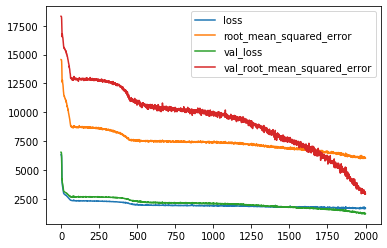

In [182]:
losses.plot()


# Evaluation on Test Data

In [183]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [184]:
predictions = NN_model.predict(X_test)

In [185]:
r2_score(y_test,predictions)  #Test data R2 Score

0.5428413489663901

In [186]:
predictions_1=NN_model.predict(X_train)

In [187]:
r2_score(y_train,predictions_1)

0.8222595976421981

In [121]:
explained_variance_score(y_test,predictions)

0.5589516685626987

# Prediction on Competition Testing Data

In [234]:
#Finding Output:
def predict_values(test1):
    missing_values_plot(test1)
    
    feature=["Population [2011]","Toilets Avl","# of hospitals","Foreign Visitors"]
    test_df=missing_values_handling(test1,feature)
    
    correlation_circle(test_df,feature)
    test_array=test_df.to_numpy()
    test_array=scaler.transform(test_array)  #Scaling the test data
    
    predictions_test=NN_model.predict(test_array)
    
    return predictions_test

In [235]:
#Making the submission file
def submission(city):
    predictions_test=predict_values(test1)
    
    city_1=pd.DataFrame(city,columns=["City"])
    test_predictions_df=pd.DataFrame(predictions_test,columns=["Covid Cases"])
    final_test=pd.concat([city_1,test_predictions_df],axis=1)
   
    return final_test

# Task 1 Predictions

                   Missing  All
Population [2011]        0  501
Toilets Avl              0  501
# of hospitals           0  501
Foreign Visitors         0  501
CSV FILE CREATED!!


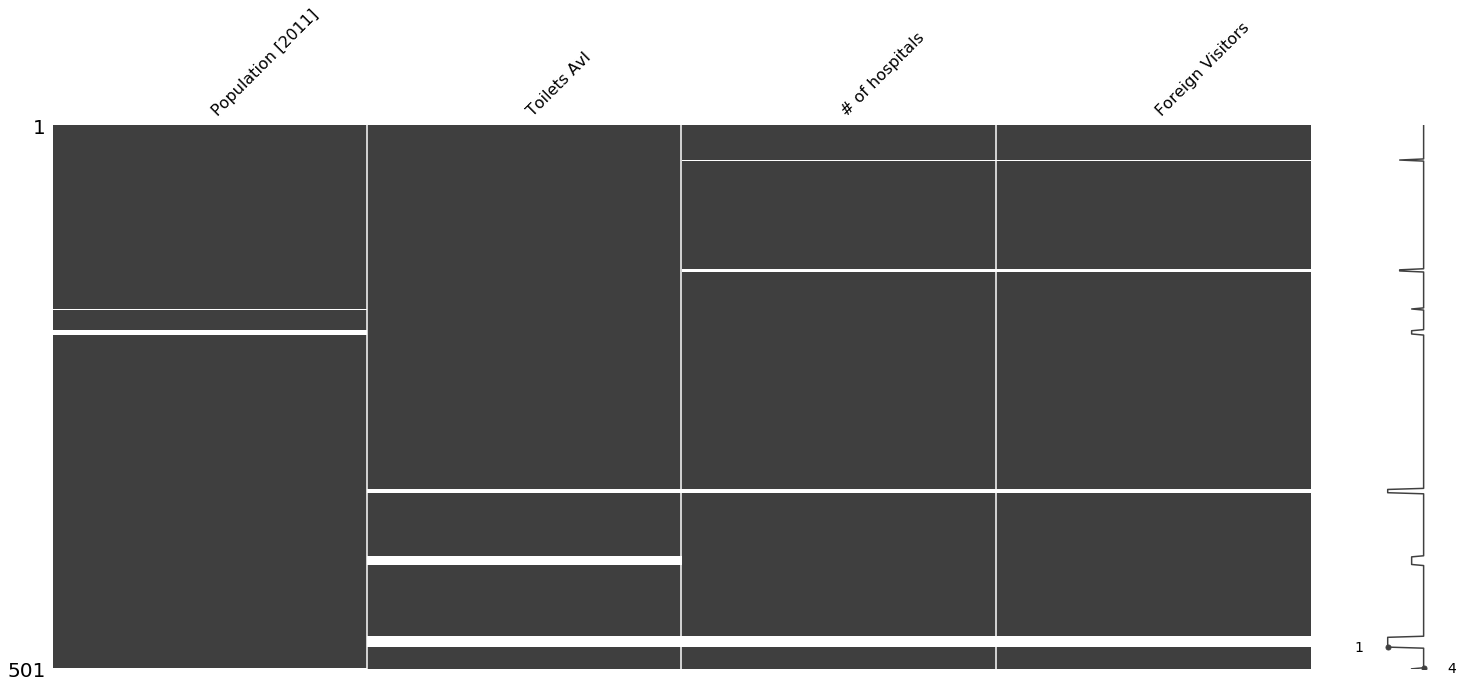

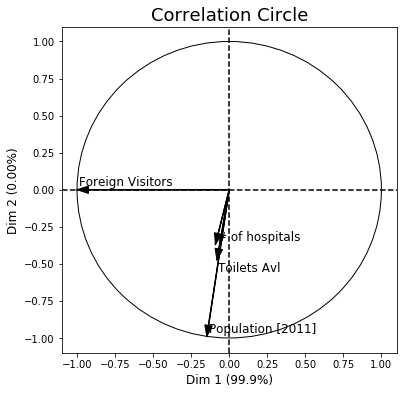

In [236]:
#Part 1 predictions
test=pd.read_excel('Test_dataset.xlsx')
test1=test.drop(columns=["City","State","Type","Popuation [2001]","Sex Ratio","Median Age","SWM","Avg Temp","Water Purity","H Index","Female Population"])
final_test_part1=submission(test["City"])
final_test_part1.to_csv("Submission_Part_1.csv")
print("CSV FILE CREATED!!")

# Task 2 Predictions

                   Missing  All
Population [2011]        0  501
Toilets Avl              0  501
# of hospitals           0  501
Foreign Visitors         0  501
CSV FILE CREATED!!


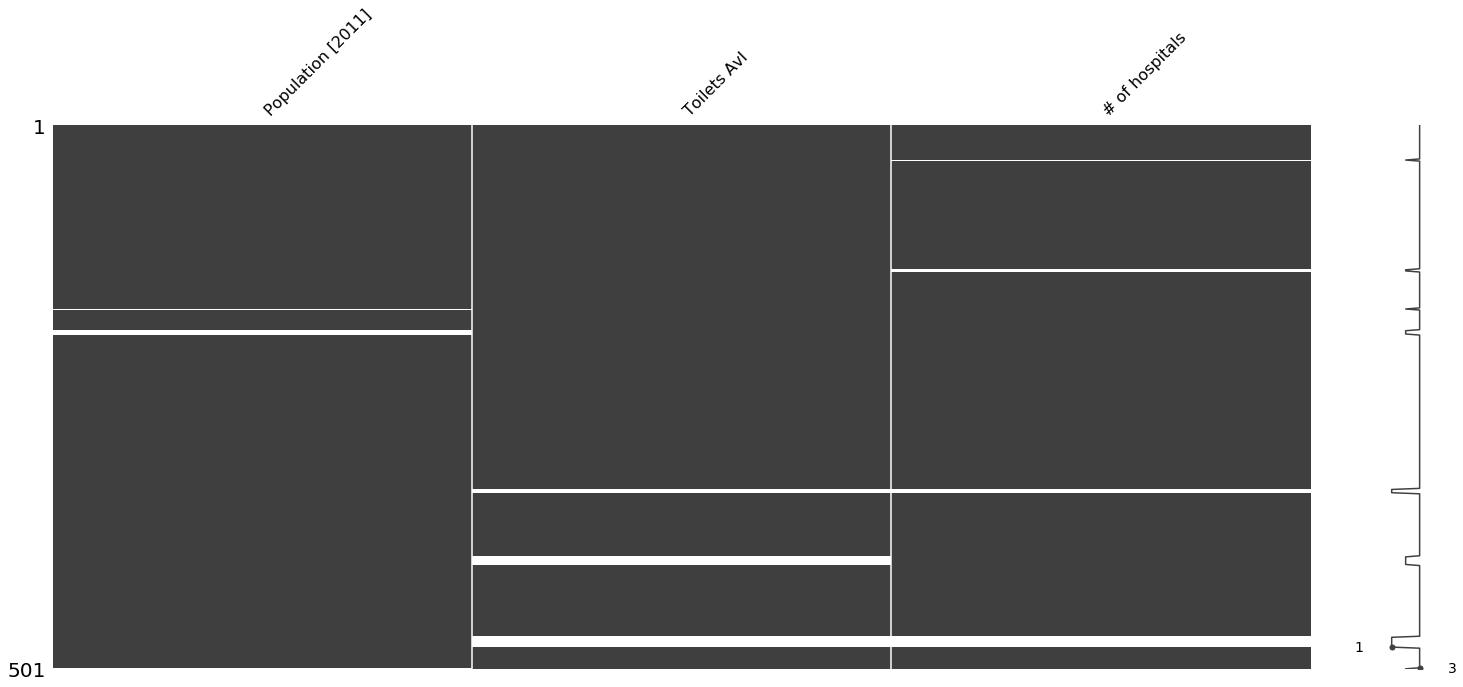

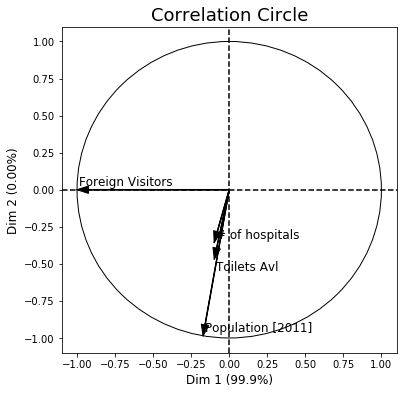

In [242]:
#Part 2 using data from Time Series Model
test=pd.read_excel('T2Test_dataset.xlsx')
test1=test.drop(columns=["Index","City","State","Type","Popuation [2001]","Sex Ratio","Median Age","SWM","Avg Temp","Water Purity","H Index","Female Population"])
final_test_part2=submission(test["City"])
final_test_part2.to_csv("Submission_Part_2.csv")
print("CSV FILE CREATED!!")